In [16]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a synthetic dataset
features, labels = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=5,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=42
)

In [17]:
# One-hot encode the target labels
num_categories = 5
one_hot_labels = np.eye(num_categories)[labels]

class SimpleNeuralNetwork:
    def __init__(self, input_dim, hidden_sizes, output_dim):
        # Hyperparameters
        self.lr = 0.001
        # Weight initialization
        self.w1 = np.random.randn(input_dim, hidden_sizes[0])
        self.w2 = np.random.randn(hidden_sizes[0], hidden_sizes[1])
        self.w3 = np.random.randn(hidden_sizes[1], hidden_sizes[2])
        self.w4 = np.random.randn(hidden_sizes[2], output_dim)

    def softmax(self, z):
        exps = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def sigmoid(self, z, derivative=False):
        if derivative:
            return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward_pass(self, X):
        self.z1 = self.sigmoid(np.dot(X, self.w1))
        self.z2 = self.sigmoid(np.dot(self.z1, self.w2))
        self.z3 = self.sigmoid(np.dot(self.z2, self.w3))
        self.output = self.softmax(np.dot(self.z3, self.w4))
        return self.output

    def backward_pass(self, X, Y, predictions):
        # Error calculation
        output_error = Y - predictions
        output_delta = self.lr * output_error

        z3_error = np.dot(output_delta, self.w4.T)
        z3_delta = z3_error * self.sigmoid(self.z3, derivative=True)

        z2_error = np.dot(z3_delta, self.w3.T)
        z2_delta = z2_error * self.sigmoid(self.z2, derivative=True)

        z1_error = np.dot(z2_delta, self.w2.T)
        z1_delta = z1_error * self.sigmoid(self.z1, derivative=True)

        # Weight updates
        self.w4 += np.dot(self.z3.T, output_delta)
        self.w3 += np.dot(self.z2.T, z3_delta)
        self.w2 += np.dot(self.z1.T, z2_delta)
        self.w1 += np.dot(X.T, z1_delta)

    def train(self, X, Y):
        predictions = self.forward_pass(X)
        self.backward_pass(X, Y, predictions)


In [18]:
# Instantiate the neural network
nn = SimpleNeuralNetwork(input_dim=20, hidden_sizes=[64, 64, 64], output_dim=num_categories)

# Training loop
num_epochs = 1000
errors = []

for epoch in range(num_epochs):
    nn.train(features, one_hot_labels)
    predictions = nn.forward_pass(features)
    errors.append(np.mean((one_hot_labels - predictions) ** 2))

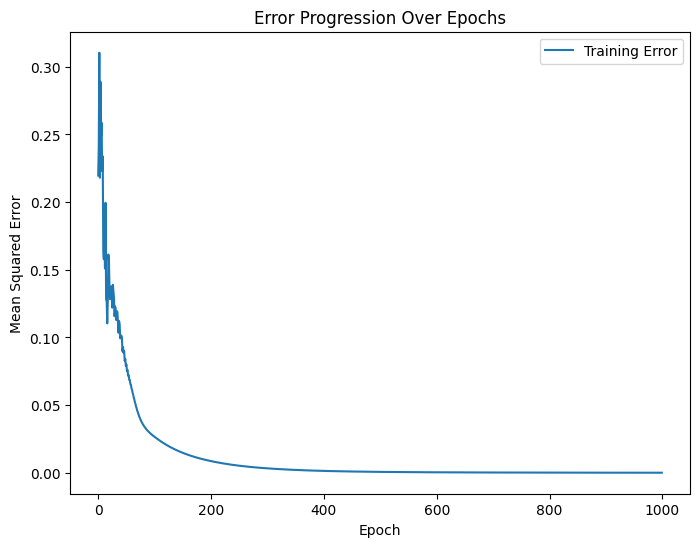

In [20]:
# Plot the training error
plt.figure(figsize=(8, 6))
plt.plot(errors, label="Training Error")
plt.title("Error Progression Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [21]:
# Evaluate the model
predicted_labels = np.argmax(nn.forward_pass(features), axis=1)
print(classification_report(labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       201

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



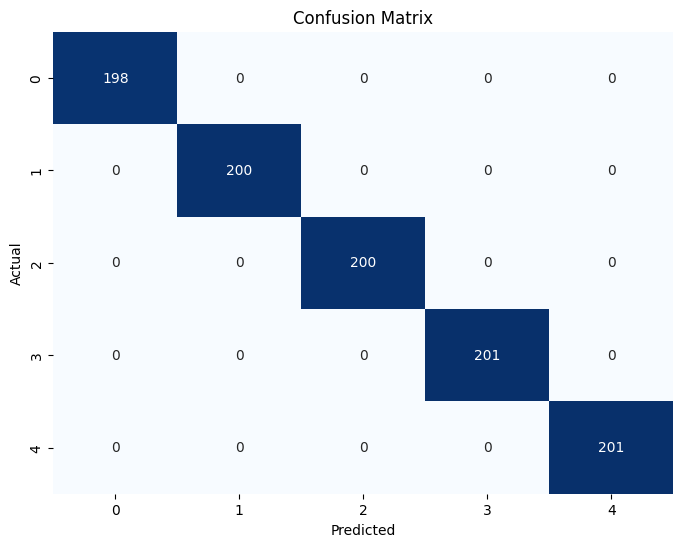

In [22]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()